In [1]:
#imports
#input
import matplotlib.pyplot as plt
import skimage
from skimage import io
from glob import glob

#image represenation
import numpy as np
from numpy import ma
import pandas as pd 

#image processing
from skimage import measure, filters, morphology, feature,segmentation, draw
from skimage.morphology import disk, square

#plotting
import seaborn as sns
import tabulate


In [2]:
radrat = 1.5

./tchakamau/Scans_of_balls\FG-w1x-01.21_001.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_001_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_002.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_002_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_003.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_003_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_004.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_004_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_005.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_005_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_006.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_006_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_007.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_007_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_008.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_008_C.tif
[            1           2           3           4           5           6     \
0     324.586639  324.215242  337.671239  327.286409  322.472533  334.485796   
1     334.128684  332.614527  333.128769  340.6

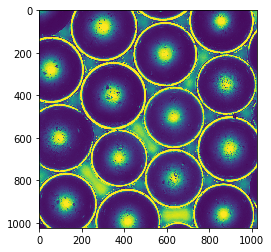

In [3]:
filenames = glob('./tchakamau/Scans_of_balls/FG-w*.csv')
filenames2 = glob('./tchakamau/Scans_of_balls/FG*_*[1-9]*_C.tif')
[print(i, z) for i,z in zip(filenames, filenames2)]
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]
intensities = [io.imread(filename2, as_gray=True) for filename2 in filenames2]

print(tables, len(tables))
plt.imshow(intensities[1])

In [4]:
def vector_dist(a, b):
    sqdist = 0
    if len(a)==len(b):
        for x, y in zip(a, b):
            square = (x-y)*(x-y)
            sqdist += square
        return np.abs(np.around(np.sqrt(sqdist), 6))
    else:
        print("Error in distances")
        
print(vector_dist((0,3), (4, 0)))

def curve_heights(distance,radius):
    if distance <= radius:
        angle = np.arcsin(distance / radius)
        height = radius * np.cos(angle)
        return np.around(height, 6)
    else:
        print(distance, radius, "Could not compute angle")
    
print(curve_heights(0, 5), curve_heights(10, 10))

5.0
5.0 0.0


[[0.25021451 0.20563294 0.19552    ... 0.02352941 0.02381216 0.02606706]
 [0.3642698  0.30100314 0.28745804 ... 0.02381216 0.02381216 0.0240949 ]
 [0.24630706 0.34527137 0.26617333 ... 0.02381216 0.0240949  0.0240949 ]
 ...
 [0.74354353 0.75082902 0.77790706 ... 0.04707373 0.03782392 0.03923059]
 [0.76145412 0.75790627 0.73479098 ... 0.04061451 0.04315216 0.04034667]
 [0.78915725 0.8237098  0.80826078 ... 0.04258667 0.03725843 0.03894784]] 1024
[[0.80339294 0.77932863 0.71012353 ... 0.02661765 0.0240949  0.02436275]
 [0.81124392 0.77257882 0.7591702  ... 0.02381216 0.02970588 0.02352941]
 [0.79301216 0.78013922 0.75491255 ... 0.02381216 0.0240949  0.02352941]
 ...
 [0.76088863 0.75330549 0.76115647 ... 0.20845255 0.15698039 0.08379569]
 [0.77473922 0.75509294 0.76954235 ... 0.19022863 0.13789333 0.07903373]
 [0.76452745 0.77722353 0.77296588 ... 0.15413882 0.10594824 0.05801216]] 1024
[[0.18633059 0.2009149  0.23904431 ... 0.08801569 0.09138667 0.10595686]
 [0.18414392 0.18165804 0.186

'     #collect image from circle mask\n        circle = np.ones_like(image)\n        circle[coords] = 0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[0][ind].imshow(ball_cap)\n        ax[1][ind].imshow(normal_cap)\n        ind +=1\n    #show subtraction fo that fom the cap as wll a the cap\n    \n    \n    for radius, center in zip(radii, centers):\n        circle = np.ones_like(image)\n        coords=draw.circle(center[0], center[1], radius)\n        circle[coords]=0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[ind].imshow(ball_cap)\n        ind +=1\n        '

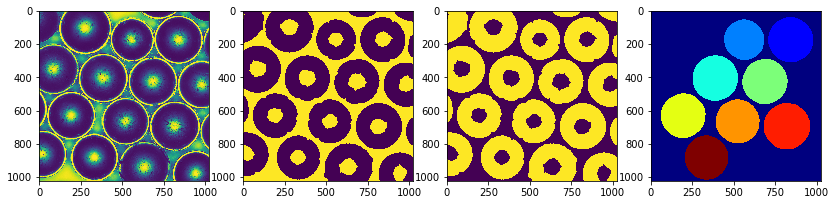

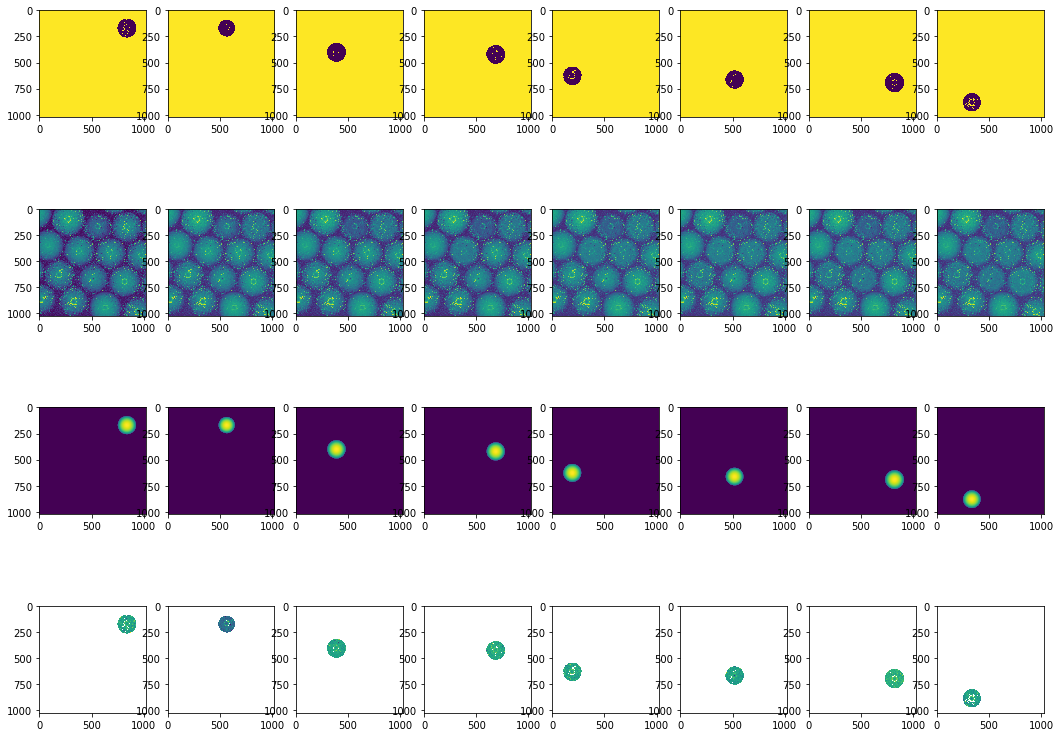

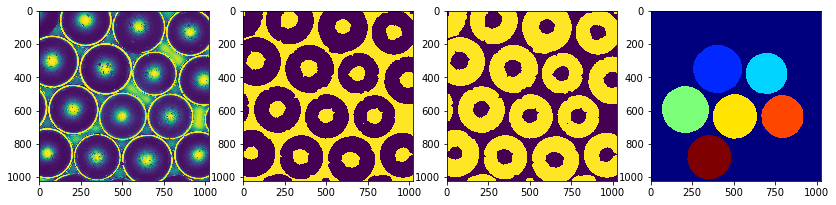

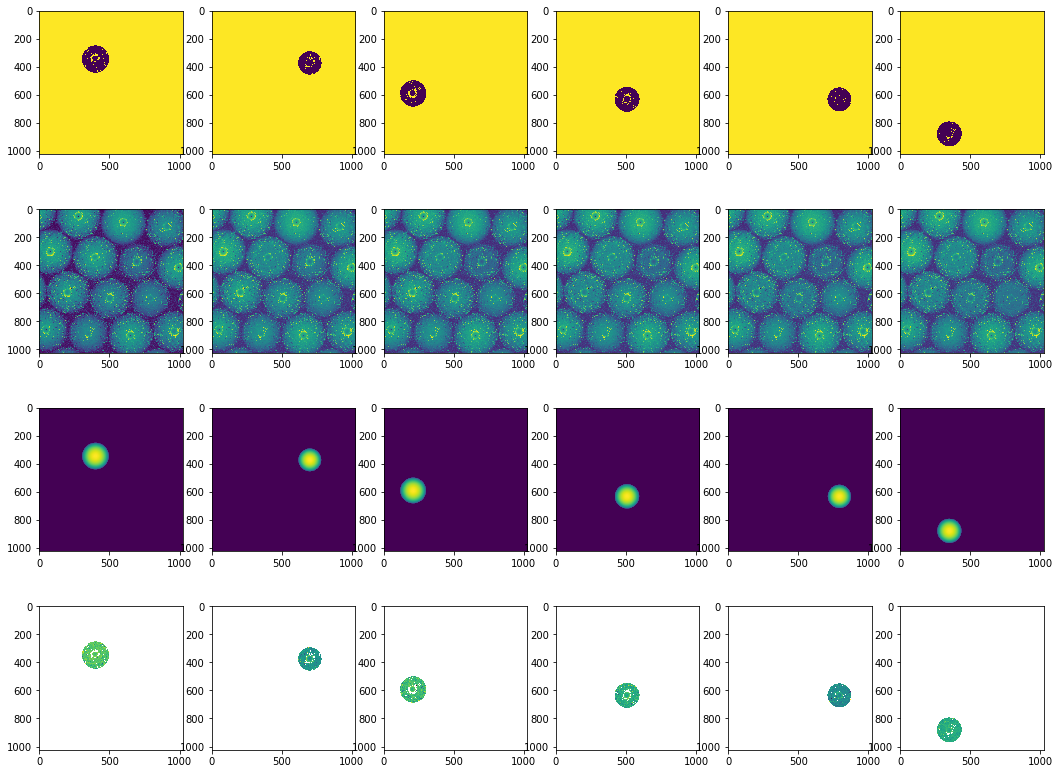

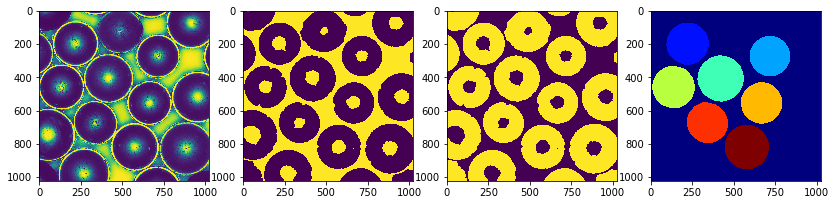

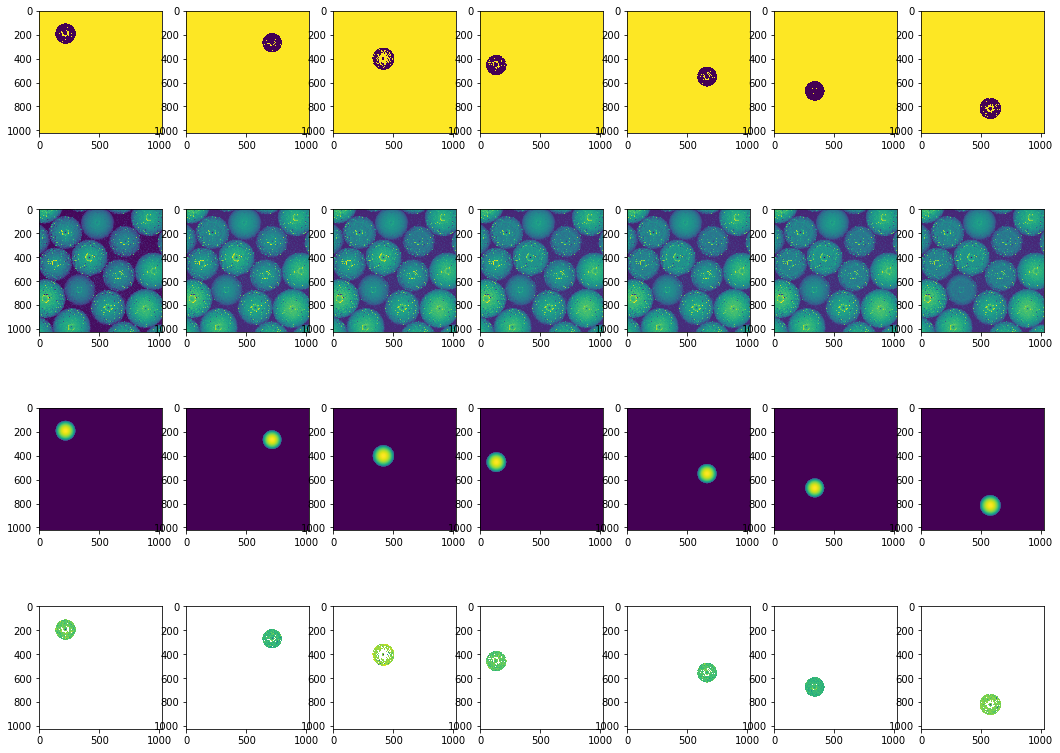

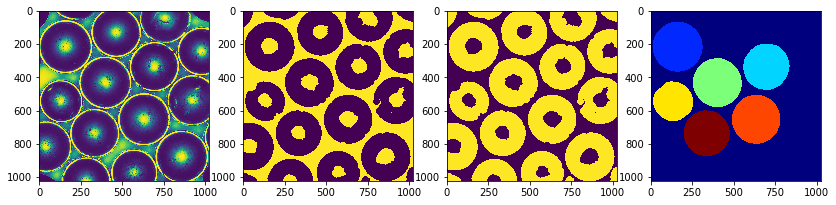

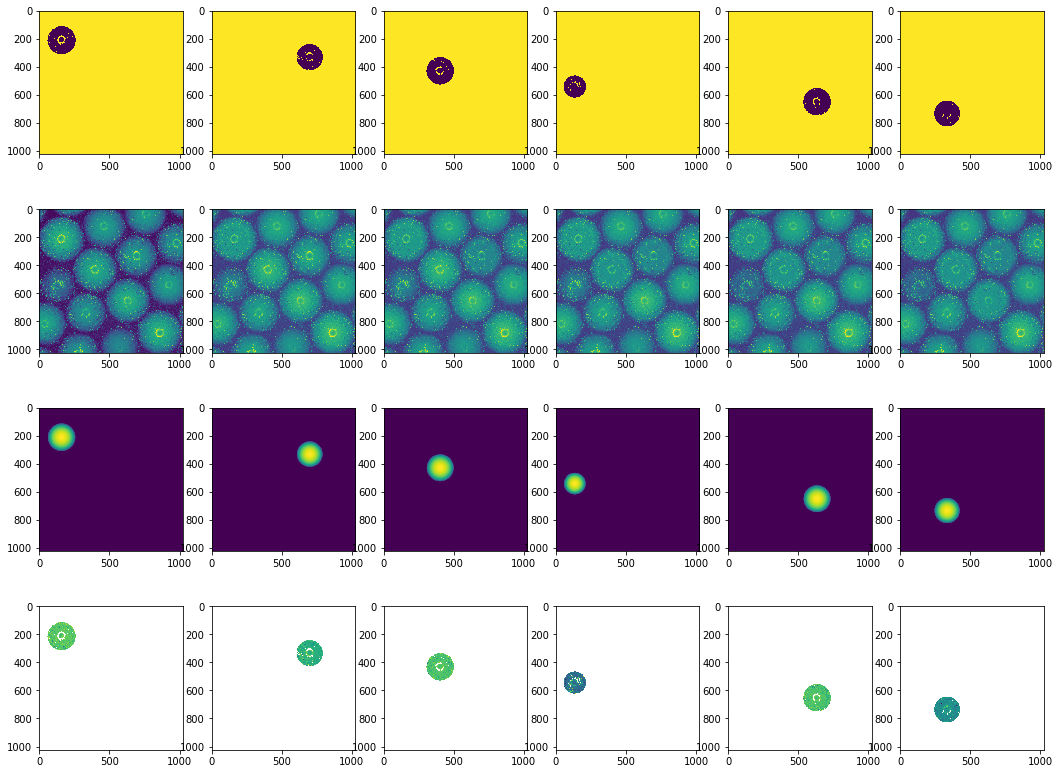

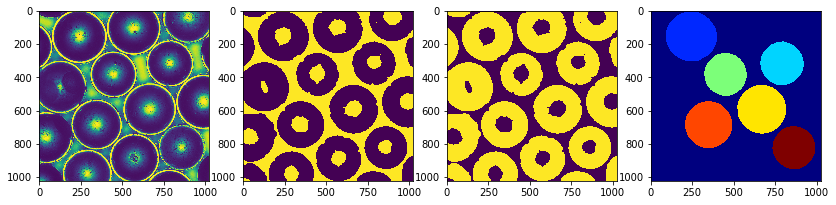

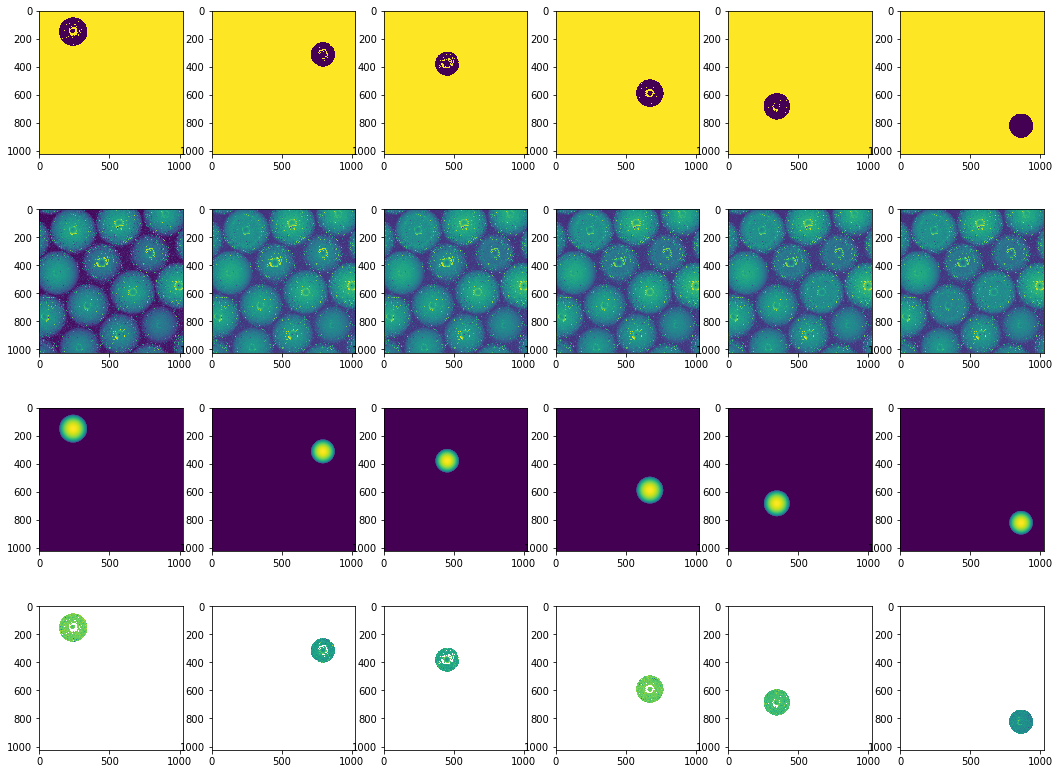

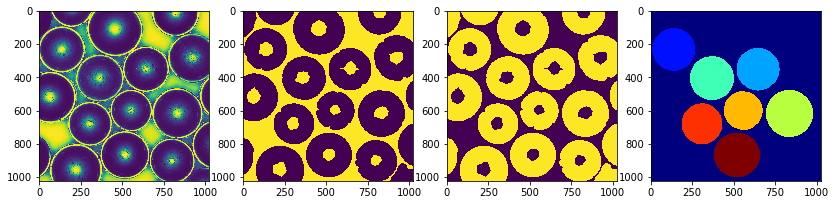

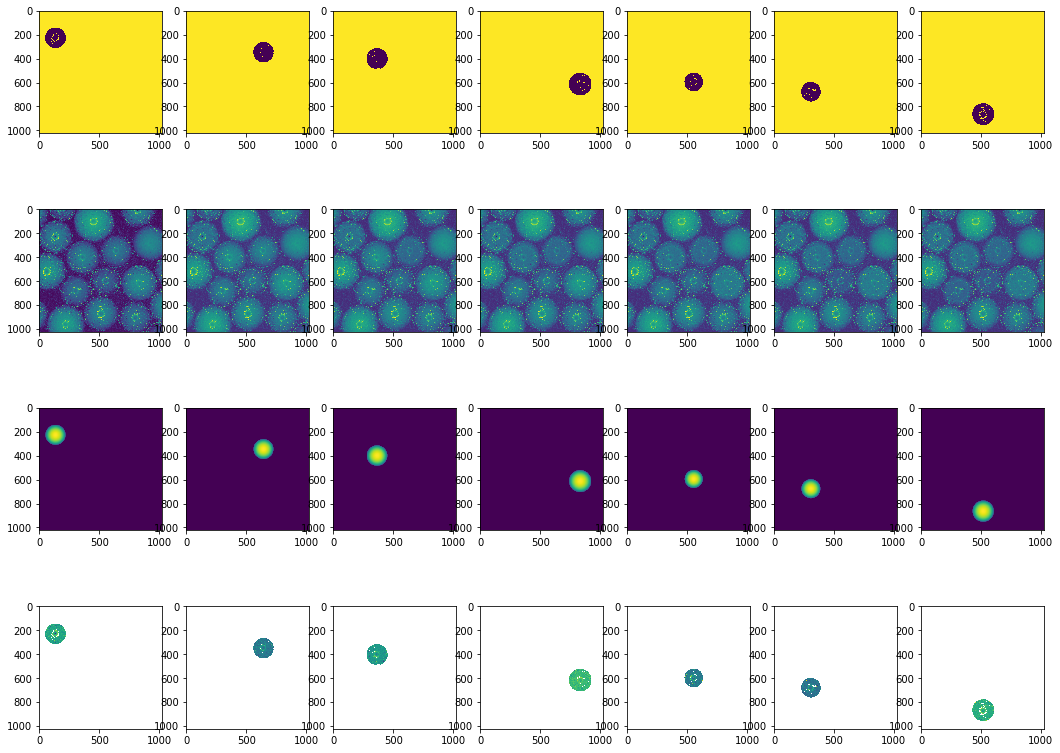

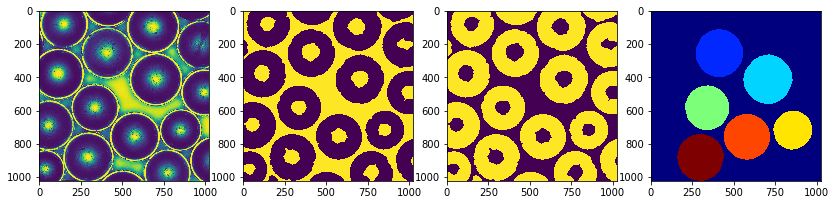

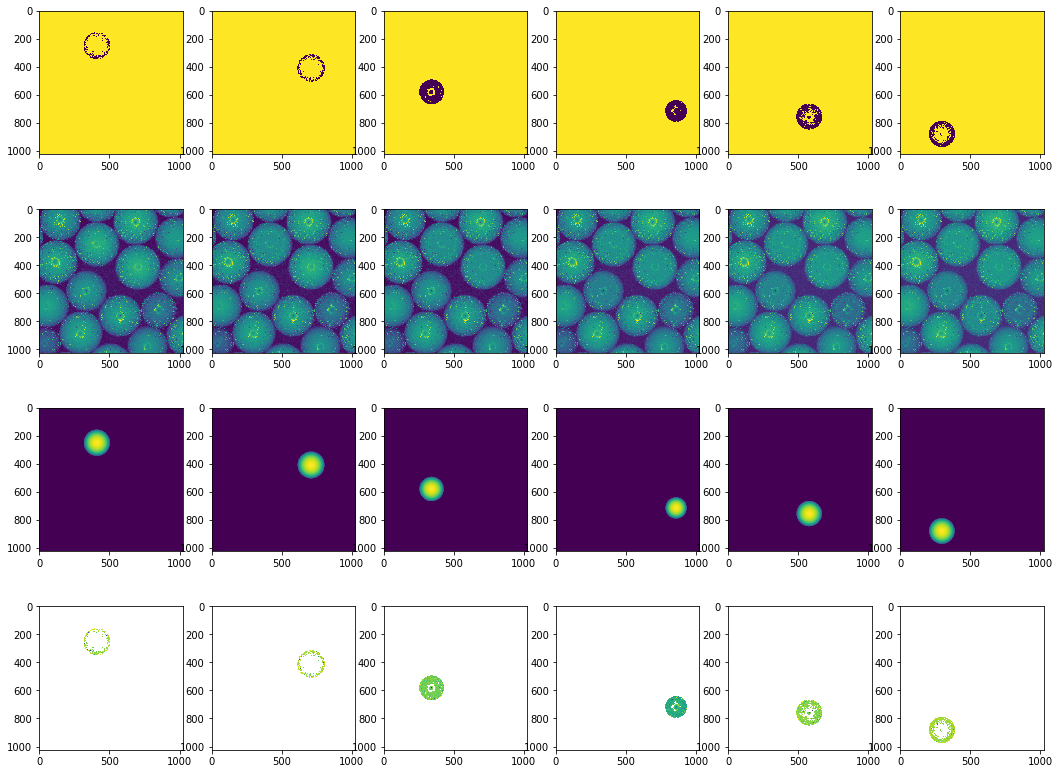

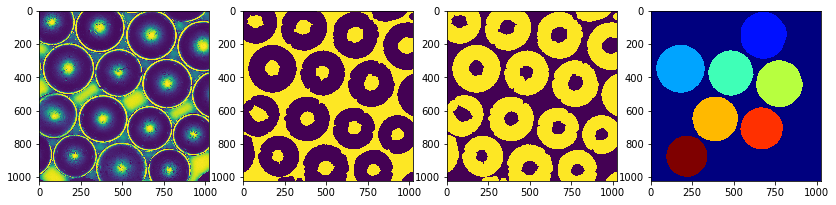

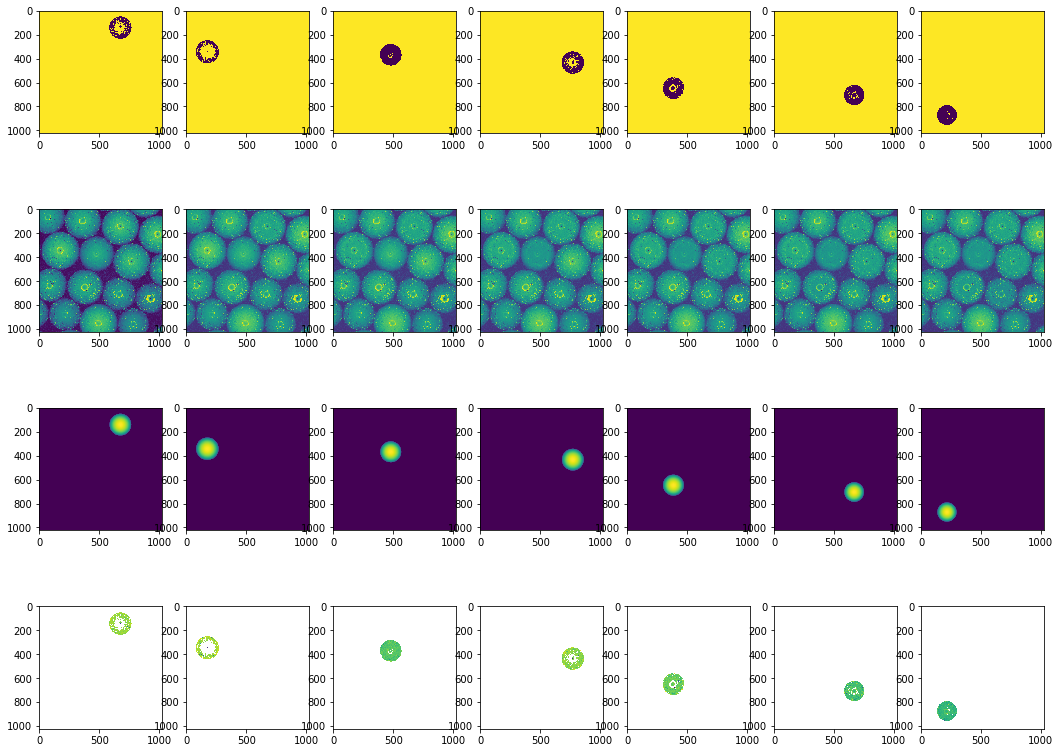

In [5]:
wroughs = []
wmeans = []

for table, intensity in zip(tables, intensities):
    intense = np.ascontiguousarray(np.fliplr(np.rot90(intensity, k=3)))
    image = np.array(table, copy=True)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(intense)
    print(intense, len(intense))
       
    bw_balls = intense  > filters.threshold_isodata(intense)
    inverse = morphology.closing(bw_balls, disk(20))
    filled_balls =np.invert(inverse)#morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    inner_balls = segmentation.clear_border(filled_balls)
    labeled_balls = measure.label(morphology.convex_hull_object(inner_balls))
    
    ax[1].imshow(inverse)
    ax[2].imshow(filled_balls)#(filled_balls)
    ax[3].imshow(labeled_balls, cmap='jet')
    
    # collect radii in a list
    regions = measure.regionprops(labeled_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    piece_radii = [x/radrat for x in radii] # use 1/radrat of a radius
    
    ##Plot image of the circular region for each ball collected, varying in intensity 
    #make function that takes centers and circles and makes the map
    #by making the circles and setting them to 1
    fig, ax = plt.subplots(nrows = 4, ncols = len(regions), figsize=(18, 14))
    ind = 0
    #blank = np.zeros_like(image)
    for center, radius in zip(centers, piece_radii): # per ball
        coords = draw.circle(center[0], center[1], radius)
        blank = np.zeros_like(image)
        circle = np.ones_like(image)
        circle[coords] = 0
        circle[image > 420] = 1
        #print(len(coords))
        #print(list(coords))
        
        #Set heights of circle mask 
        for row, column in zip(coords[0], coords[1]):
            #print(row, column)
            #print(center)
            distance= vector_dist((row, column), center)
            #print(distance)      
            curve_height = curve_heights(distance, radius)
            blank[(row, column)] = curve_height #set the heights of the mask
        
        ax[0][ind].imshow(circle)
        ax[1][ind].imshow(image)
        image = image - blank
        #ax[2][ind].imshow(image)
        ball_cap = ma.masked_array(image, circle)
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[2][ind].imshow(blank)
        ax[3][ind].imshow(ball_cap)
        #ax[4][ind].hist(ball_cap)
        ind += 1
"""     #collect image from circle mask
        circle = np.ones_like(image)
        circle[coords] = 0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[0][ind].imshow(ball_cap)
        ax[1][ind].imshow(normal_cap)
        ind +=1
    #show subtraction fo that fom the cap as wll a the cap
    
    
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        """
        

[34.55583025399609, 40.9990185955067, 28.376820906030293, 30.64473268038785, 37.43982075889888, 32.060951040909565, 26.79910063594393, 40.81981152542292, 33.511520203774786, 42.127311582103424, 39.517518645410206, 37.693005629160766, 28.39224791533082, 28.39903060719881, 30.02444344446702, 28.19284669907175, 35.63586928645829, 29.388460953084035, 25.260037033863203, 18.793937435775934, 25.395874189605543, 30.15914529440466, 30.18291522993717, 27.16567200255211, 44.62246165349032, 25.790157456133812, 28.962939250056063, 26.255583553218703, 31.526617215271404, 35.00687008810295, 22.27637531073495, 21.89448964909611, 19.507091293162553, 34.49179860920334, 28.969547633031052, 31.739427734071665, 26.91151085568294, 43.01845073981062, 33.13056256106954, 29.52363612063315, 37.0224991206446, 34.30834705087719, 22.829021650359234, 33.47721171406384, 34.67744997029105, 27.099496481980907, 30.629417756250998, 33.79235863818682, 19.10566634757692, 28.48308337163387, 33.7328584973374, 33.3498542335

Text(0.5, 0, "Mean value - 'Intensity'")

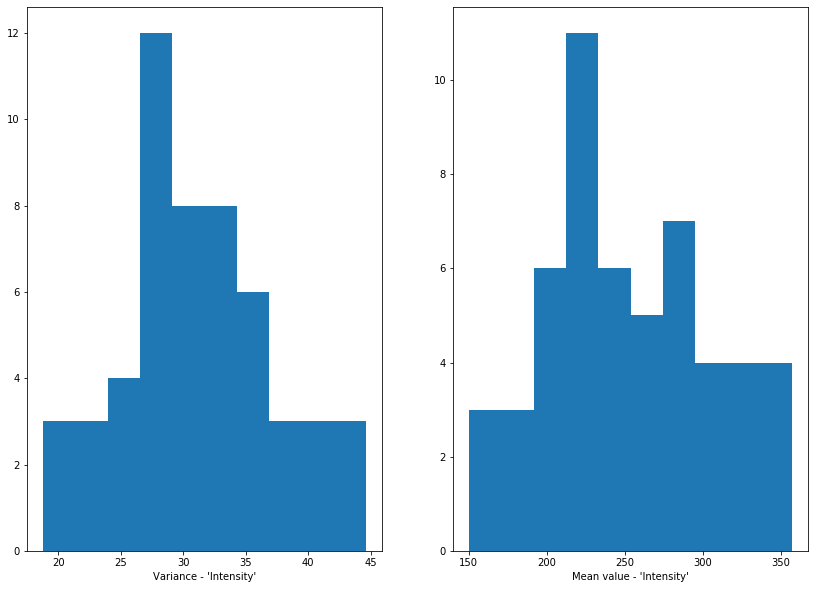

In [6]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(wroughs, len(wroughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(wroughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(wmeans)
ax[1].set_xlabel("Mean value - 'Intensity'")

./tchakamau/Scans_of_balls\FG-S-w0x-01.17_001.csv ./tchakamau/Scans_of_balls\G_001_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_002.csv ./tchakamau/Scans_of_balls\G_002_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_003.csv ./tchakamau/Scans_of_balls\G_003_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_004.csv ./tchakamau/Scans_of_balls\G_004_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_005.csv ./tchakamau/Scans_of_balls\G_005_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_006.csv ./tchakamau/Scans_of_balls\G_006_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_007.csv ./tchakamau/Scans_of_balls\G_007_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_008.csv ./tchakamau/Scans_of_balls\G_008_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_009.csv ./tchakamau/Scans_of_balls\G_009_C.tif
./tchakamau/Scans_of_balls\FG-S-w0x-01.17_010.csv ./tchakamau/Scans_of_balls\G_010_C.tif
[            1           2          3           4           5          6     \
0      67.369776   74.643921  4

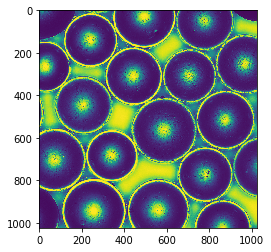

In [7]:
filenames = glob('./tchakamau/Scans_of_balls/FG-S*.csv')
filenames2 = glob('./tchakamau/Scans_of_balls/G*_*[1-9]*_C.tif')
[print(i, z) for i,z in zip(filenames, filenames2)]
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]
intensities = [io.imread(filename2, as_gray=True) for filename2 in filenames2]

print(tables, len(tables))
plt.imshow(intensities[1])

[[0.01819412 0.02220431 0.12862078 ... 0.04230392 0.03585961 0.03502627]
 [0.01959294 0.04070392 0.14456784 ... 0.04398549 0.04512431 0.03951333]
 [0.0218251  0.04795882 0.19536431 ... 0.04174549 0.04400039 0.04625529]
 ...
 [0.13866863 0.12021451 0.12159843 ... 0.4085498  0.37856039 0.4082302 ]
 [0.10728824 0.10842706 0.10649255 ... 0.4015102  0.40036353 0.41989686]
 [0.11432863 0.11962627 0.17875608 ... 0.40265686 0.40709137 0.41721216]] 1024
[[0.63608196 0.65997725 0.63296745 ... 0.0775902  0.08599882 0.11426118]
 [0.58549451 0.60706745 0.62392039 ... 0.0890949  0.10677608 0.08545608]
 [0.56930392 0.47336039 0.42409137 ... 0.09665529 0.09021098 0.07506745]
 ...
 [0.02745098 0.02606706 0.02829922 ... 0.56045882 0.50018157 0.41351765]
 [0.02745098 0.02773373 0.03053922 ... 0.52060863 0.42473176 0.44017451]
 [0.02773373 0.03053922 0.02773373 ... 0.56938824 0.5124451  0.54692314]] 1024
[[0.16117137 0.15497294 0.13955451 ... 0.94455451 0.94233725 0.94012784]
 [0.17572667 0.16581412 0.160

IndexError: index 1024 is out of bounds for axis 0 with size 1024

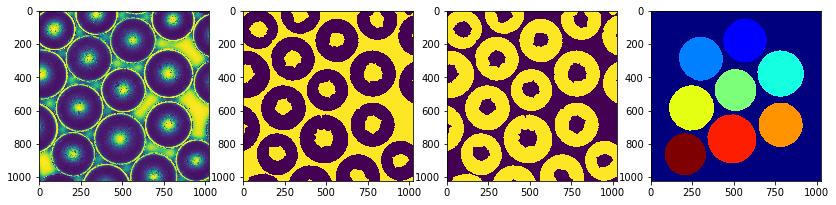

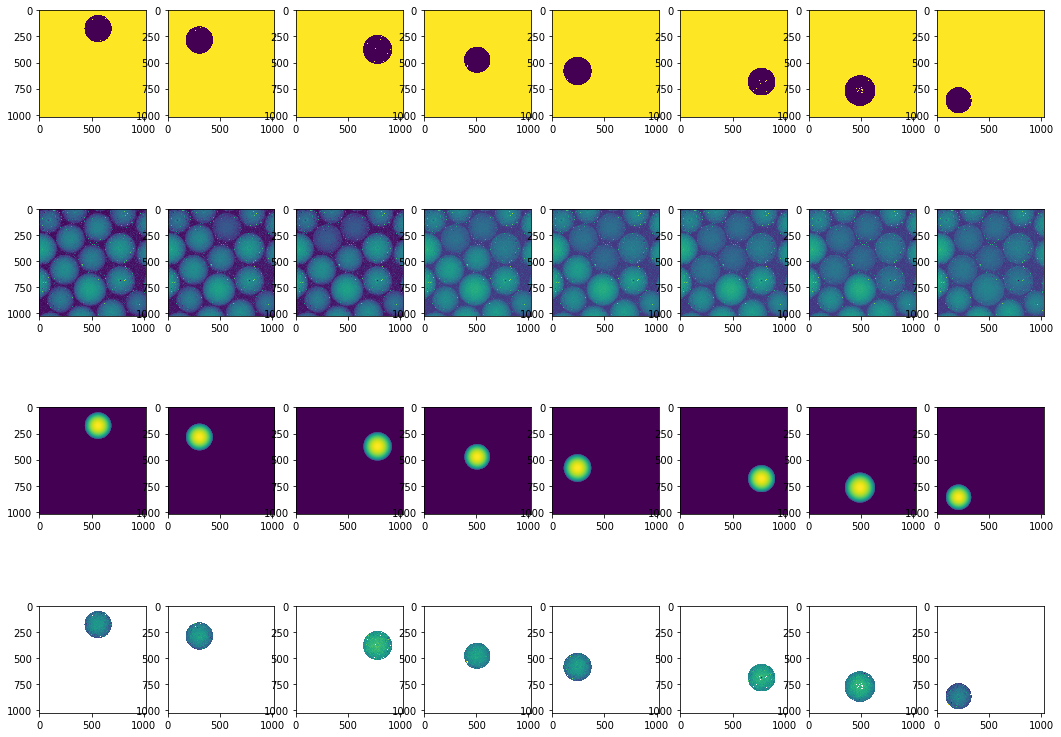

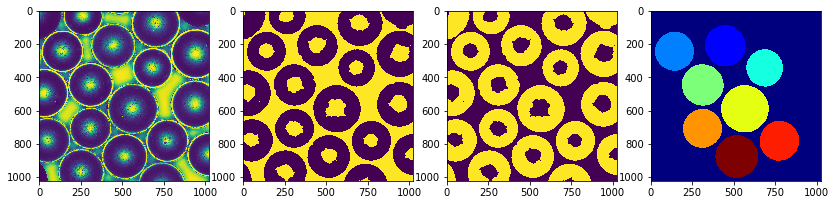

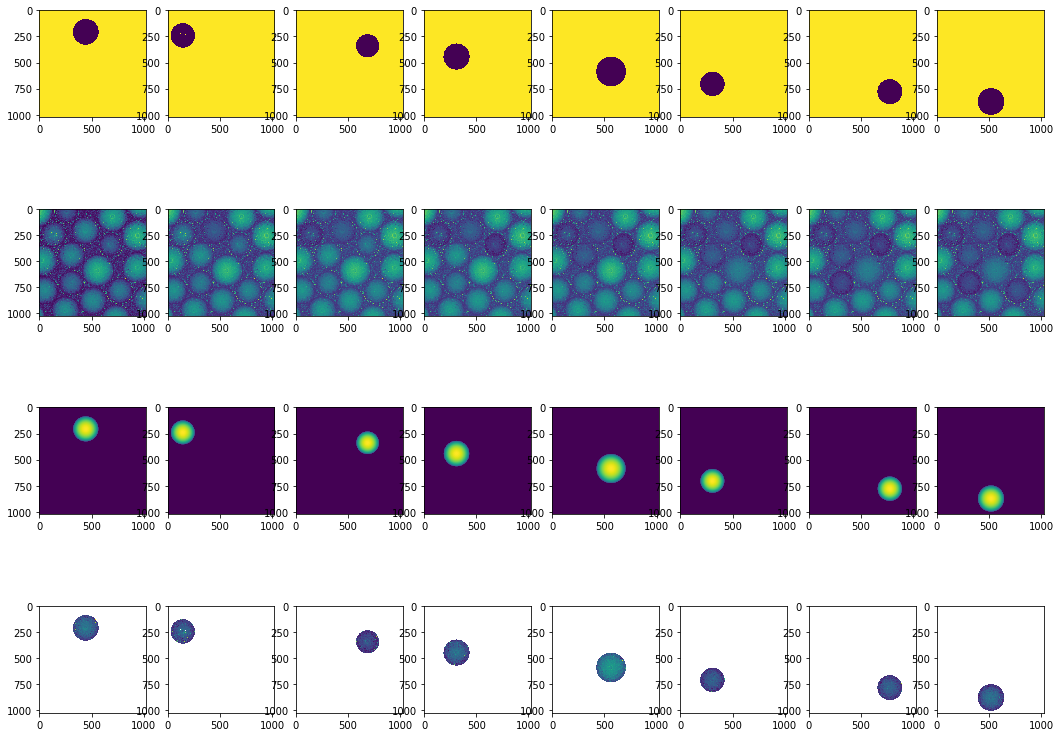

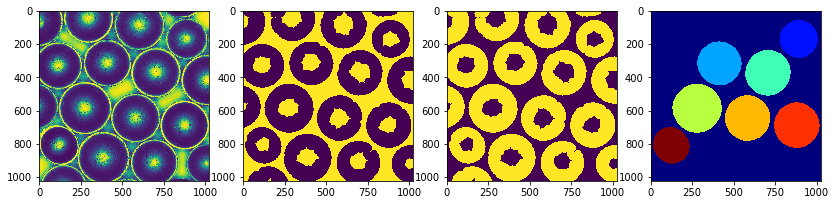

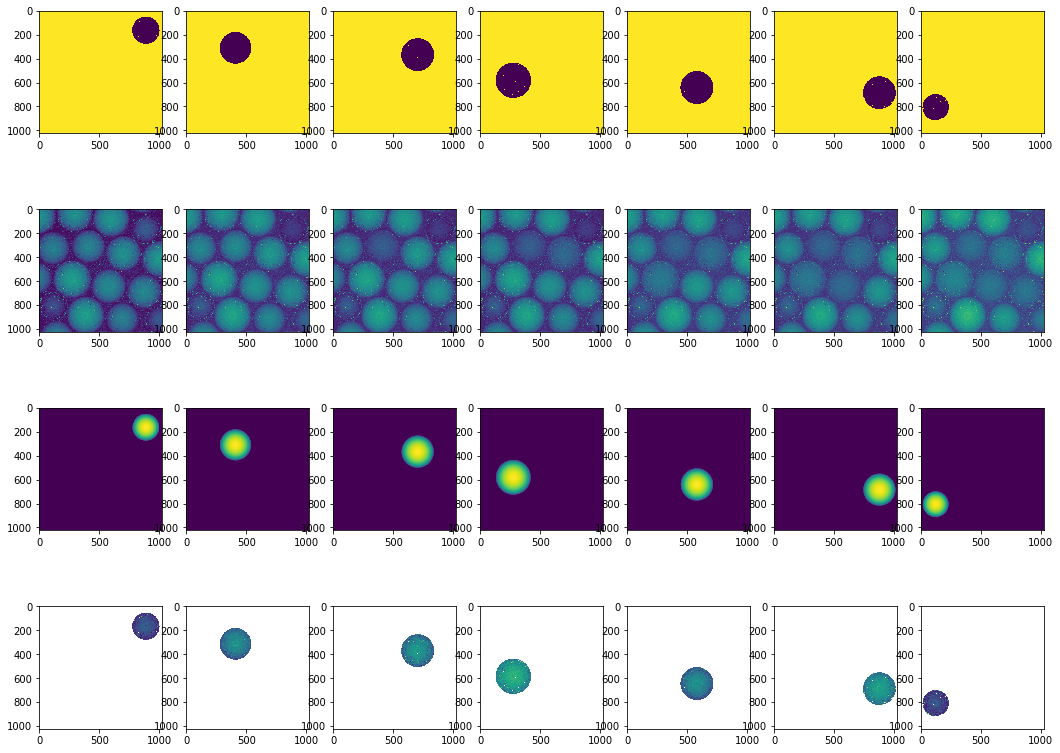

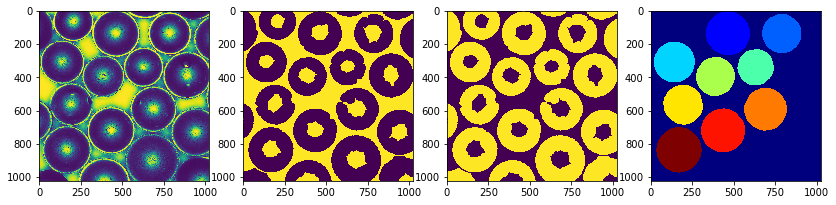

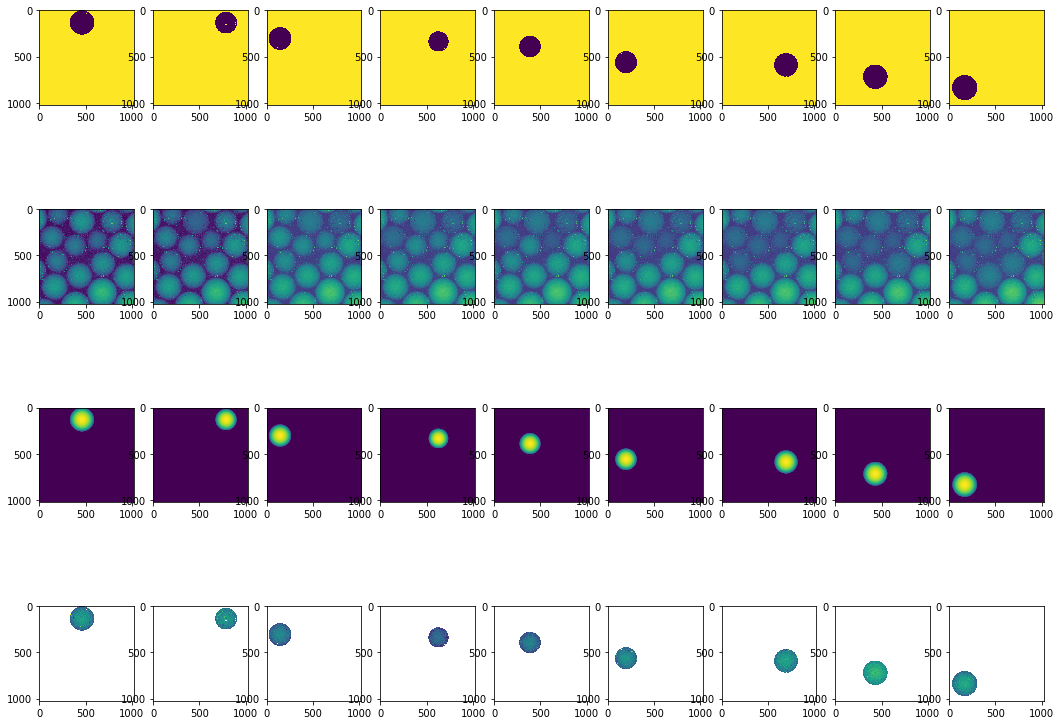

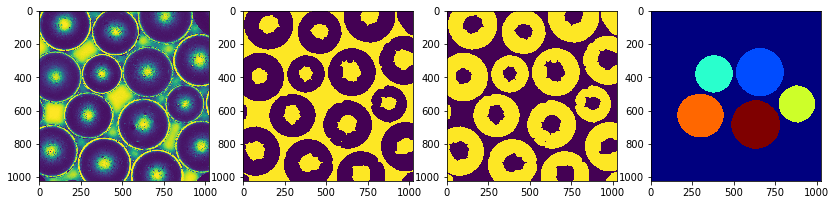

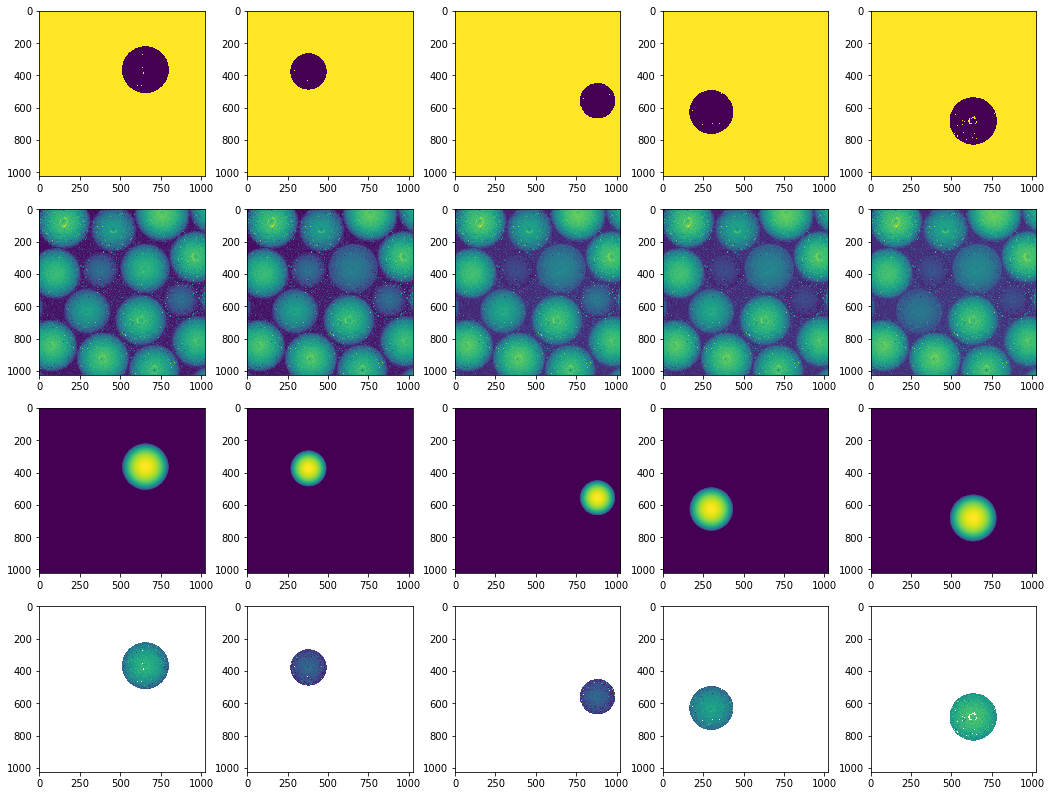

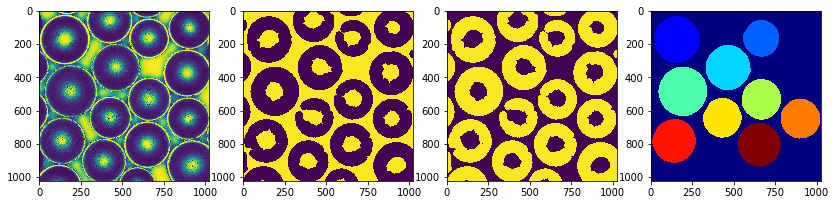

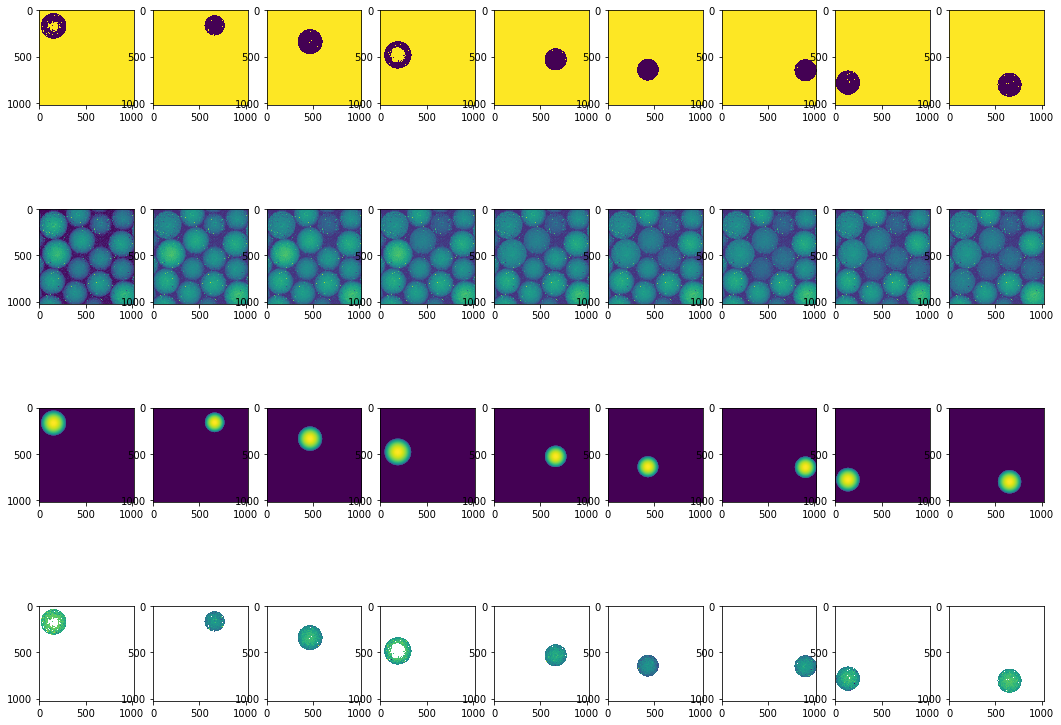

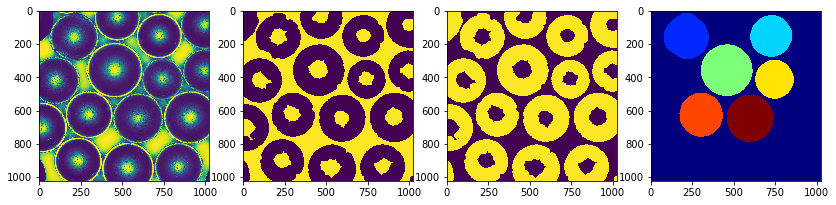

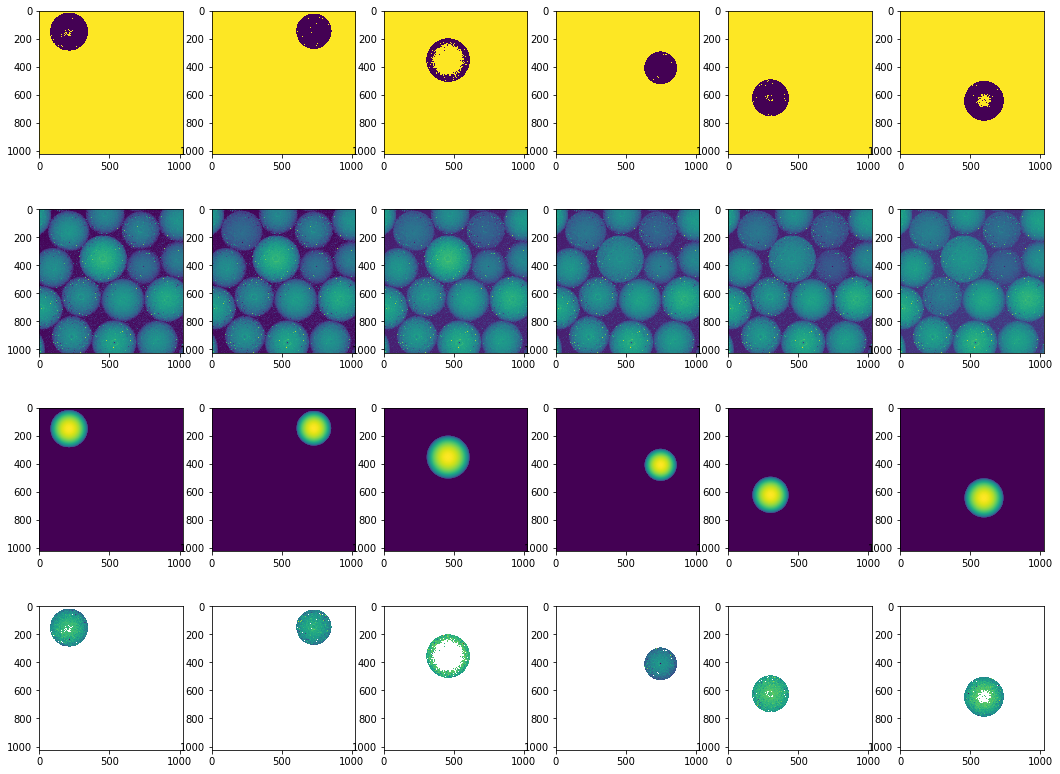

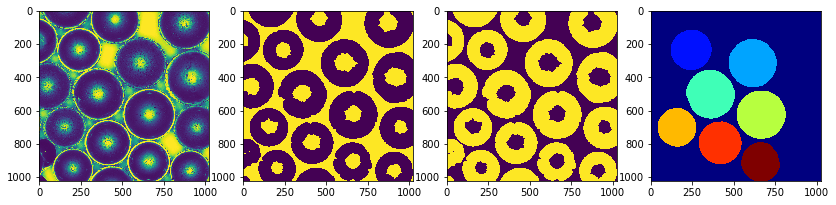

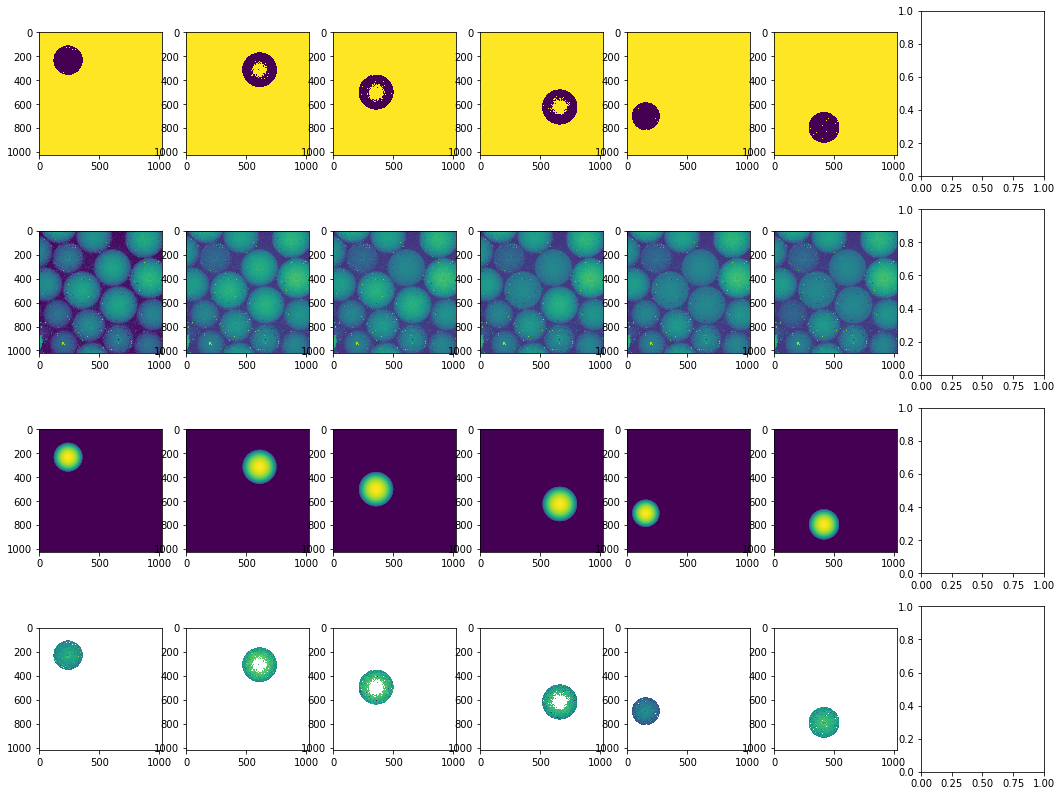

In [8]:
roughs = []
means = []

for table, intensity in zip(tables, intensities):
    intense = np.ascontiguousarray(np.fliplr(np.rot90(intensity, k=3)))
    image = np.array(table, copy=True)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(intense)
    print(intense, len(intense))
       
    bw_balls = intense  > filters.threshold_isodata(intense)
    inverse = morphology.closing(bw_balls, disk(20))
    filled_balls =np.invert(inverse)#morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    inner_balls = segmentation.clear_border(filled_balls)
    labeled_balls = measure.label(morphology.convex_hull_object(inner_balls))
    
    ax[1].imshow(inverse)
    ax[2].imshow(filled_balls)#(filled_balls)
    ax[3].imshow(labeled_balls, cmap='jet')
    
    # collect radii in a list
    regions = measure.regionprops(labeled_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    piece_radii = [x/radrat for x in radii] # use 1/radrat of a radius
    
    ##Plot image of the circular region for each ball collected, varying in intensity 
    #make function that takes centers and circles and makes the map
    #by making the circles and setting them to 1
    fig, ax = plt.subplots(nrows = 4, ncols = len(regions), figsize=(18, 14))
    ind = 0
    #blank = np.zeros_like(image)
    for center, radius in zip(centers, radii): # per ball
        coords = draw.circle(center[0], center[1], radius)
        blank = np.zeros_like(image)
        circle = np.ones_like(image)
        circle[coords] = 0
        circle[image > 420] = 1
        #print(len(coords))
        #print(list(coords))
        
        #Set heights of circle mask 
        for row, column in zip(coords[0], coords[1]):
            #print(row, column)
            #print(center)
            distance= vector_dist((row, column), center)
            #print(distance)      
            curve_height = curve_heights(distance, radius)
            blank[(row, column)] = curve_height #set the heights of the mask
        
        ax[0][ind].imshow(circle)
        ax[1][ind].imshow(image)
        image = image - blank
        #ax[2][ind].imshow(image)
        ball_cap = ma.masked_array(image, circle)
        roughness = np.std(ball_cap)
        mean = np.mean(ball_cap)
        roughs.append(roughness)
        means.append(mean)
        ax[2][ind].imshow(blank)
        ax[3][ind].imshow(ball_cap)
        #ax[4][ind].hist(ball_cap)
        ind += 1

[36.47820418834662, 36.50680994026069, 40.16213895957784, 36.24980387944668, 37.07954874463935, 40.634101030110344, 37.127879822687795, 35.38731141208184, 35.760663032714106, 49.2366535494857, 37.958610403207665, 39.67053701045247, 39.41365208573496, 31.793670076940714, 36.73906287454106, 34.651623318868964, 39.04658186923678, 37.77044020493922, 39.70096547614546, 41.8182442870105, 36.682737515841886, 40.96707311595555, 50.26552537788087, 37.34735937348639, 43.78660065884362, 37.29311956631069, 35.68541017362601, 34.41080275716839, 37.29166355379556, 37.21719300837821, 36.350438893872855, 38.38309251061781, 39.361422057424775, 38.14705836933521, 39.35222517979319, 40.07187003987556, 39.80071125739308, 40.05053188394048, 40.55886703515077, 37.60908004703482, 34.784380284094986, 36.561541797398384, 32.7154283464721, 38.16828558645625, 37.56509981441103, 37.66488340838729, 39.872658825561416, 38.784282051937396, 32.3950209458238, 35.179720839994175, 39.713484802204356, 34.75434567590576, 

Text(0.5, 0, "Mean value - 'Intensity'")

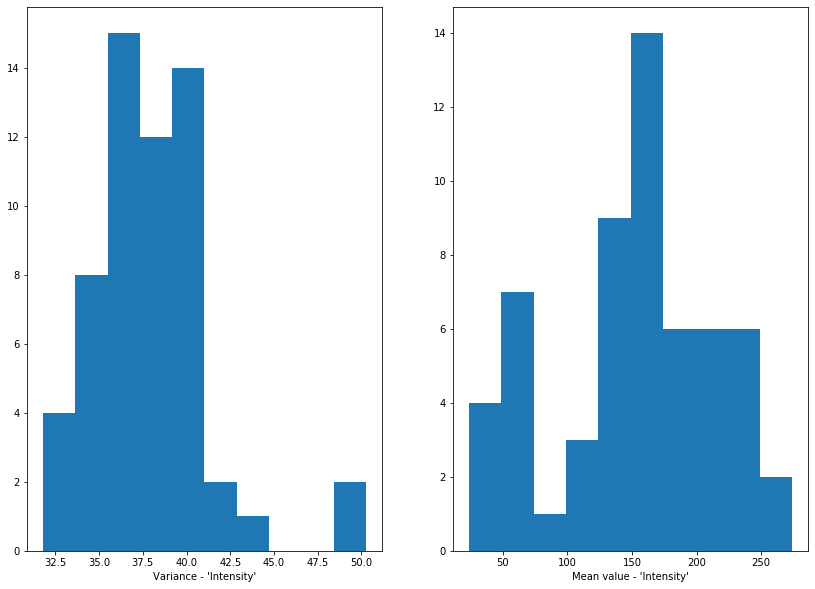

In [9]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(roughs, len(roughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(roughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(means)
ax[1].set_xlabel("Mean value - 'Intensity'")

Text(0, 0.5, 'Frequency')

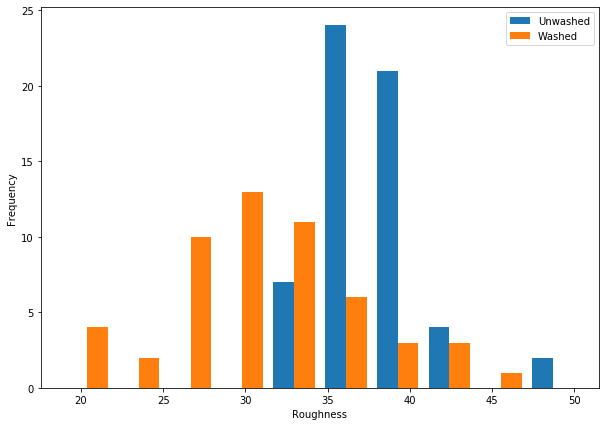

In [10]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist((roughs, wroughs), label = ("Unwashed", "Washed"))
ax.legend(prop={'size': 10})
ax.set_xlabel("Roughness")
ax.set_ylabel("Frequency")